In [76]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [77]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [78]:
# Add the latitudes and longitudes to a list. unpack our lat_lngs zip object into a list
coordinates = list(lat_lngs)

In [79]:
# import the citipy module 
from citipy import citipy

In [80]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [81]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [82]:
# Build the basic URL for the OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?q="

In [83]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [84]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    if (i % 50 == 0 and i >= 50):
        # # Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
        set_count += 1
        record_count = 1
    # 4 Build the city_url or endpoint for each city.
    city_url = url + city.replace(" ","+") + "&appid=" + weather_api_key

    # 5 Log the URL and the record and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# 6 Make an API request for each city.
    try:
        # 7. Parse the JSON weather data for the following:
            # # City, country, and date
            # # Latitude and longitude
            # # Maximum temperature
            # # Humidity
            # # Cloudiness
            # # Wind speed
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | ambulu
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | marsh harbour
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | mchinji
Processing Record 8 of Set 1 | sulangan
Processing Record 9 of Set 1 | matagami
Processing Record 10 of Set 1 | esperance
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | phumi samraong
City not found. Skipping...
Processing Record 17 of Set 1 | kaeo
Processing Record 18 of Set 1 | alekseyevskoye
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | faya
Processing Record 22 of Set 1 | takoradi
Processing Record 23 of Set 1 | chikoy
City not found. Skipping...
Proces

Processing Record 39 of Set 4 | aflu
City not found. Skipping...
Processing Record 40 of Set 4 | zhuanghe
Processing Record 41 of Set 4 | pasni
Processing Record 42 of Set 4 | cidreira
Processing Record 43 of Set 4 | vung tau
Processing Record 44 of Set 4 | missoula
Processing Record 45 of Set 4 | villamontes
Processing Record 46 of Set 4 | waipawa
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | knoxville
Processing Record 50 of Set 4 | san jose
Processing Record 1 of Set 5 | ndele
Processing Record 2 of Set 5 | ribeira grande
Processing Record 3 of Set 5 | srednekolymsk
Processing Record 4 of Set 5 | neiafu
Processing Record 5 of Set 5 | boyolangu
Processing Record 6 of Set 5 | fort nelson
Processing Record 7 of Set 5 | amatan
Processing Record 8 of Set 5 | prince rupert
Processing Record 9 of Set 5 | trairi
Processing Record 10 of Set 5 | anadyr
Processing Record 11 of Set 5 | westport
Processing Record 12 of Set 5 

Processing Record 31 of Set 8 | bathsheba
Processing Record 32 of Set 8 | jeremie
Processing Record 33 of Set 8 | la ronge
Processing Record 34 of Set 8 | bodo
Processing Record 35 of Set 8 | gwadar
Processing Record 36 of Set 8 | port augusta
Processing Record 37 of Set 8 | sarakhs
Processing Record 38 of Set 8 | mangan
Processing Record 39 of Set 8 | thunder bay
Processing Record 40 of Set 8 | pangnirtung
Processing Record 41 of Set 8 | ustyuzhna
Processing Record 42 of Set 8 | aitape
Processing Record 43 of Set 8 | prainha
Processing Record 44 of Set 8 | chunskiy
Processing Record 45 of Set 8 | katsuura
Processing Record 46 of Set 8 | tilichiki
Processing Record 47 of Set 8 | alangilan
Processing Record 48 of Set 8 | bac lieu
Processing Record 49 of Set 8 | alta floresta
Processing Record 50 of Set 8 | tura
Processing Record 1 of Set 9 | henties bay
Processing Record 2 of Set 9 | buchanan
Processing Record 3 of Set 9 | lokosovo
Processing Record 4 of Set 9 | iquique
Processing Recor

Processing Record 17 of Set 12 | manokwari
Processing Record 18 of Set 12 | teluk nibung
Processing Record 19 of Set 12 | chongwe
Processing Record 20 of Set 12 | labutta
City not found. Skipping...
Processing Record 21 of Set 12 | salinas
Processing Record 22 of Set 12 | garowe
Processing Record 23 of Set 12 | tsiroanomandidy
Processing Record 24 of Set 12 | erechim
Processing Record 25 of Set 12 | lekoni
Processing Record 26 of Set 12 | ochamchira
Processing Record 27 of Set 12 | supaul
Processing Record 28 of Set 12 | kismayo
Processing Record 29 of Set 12 | canto do buriti
Processing Record 30 of Set 12 | ishigaki
Processing Record 31 of Set 12 | onega
Processing Record 32 of Set 12 | palmer
Processing Record 33 of Set 12 | torrington
Processing Record 34 of Set 12 | stockton-on-tees
Processing Record 35 of Set 12 | lompoc
Processing Record 36 of Set 12 | aykhal
Processing Record 37 of Set 12 | matsubase
Processing Record 38 of Set 12 | itiuba
Processing Record 39 of Set 12 | port 

In [85]:
len(city_data)

583

In [89]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luderitz,-26.6481,15.1594,286.91,83,62,4.29,NA,2021-10-21 22:41:12
1,Ambulu,-8.3450,113.6058,298.24,86,100,0.96,ID,2021-10-21 22:41:28
2,Albany,42.6001,-73.9662,292.47,68,79,1.89,US,2021-10-21 22:37:09
3,Marsh Harbour,26.5412,-77.0636,299.74,74,86,6.94,BS,2021-10-21 22:41:29
4,Ponta Do Sol,32.6667,-17.1000,294.66,64,8,2.99,PT,2021-10-21 22:40:47
5,Hobart,-42.8794,147.3294,291.07,76,75,1.34,AU,2021-10-21 22:37:51
6,Mchinji,-13.7984,32.8802,290.90,73,67,2.28,MW,2021-10-21 22:41:29
7,Sulangan,11.1373,123.7228,301.52,77,89,6.14,PH,2021-10-21 22:41:30
8,Matagami,49.7502,-77.6328,273.21,100,90,3.09,CA,2021-10-21 22:41:30
9,Esperance,-33.8667,121.9000,286.06,74,71,5.28,AU,2021-10-21 22:41:31


In [90]:
# reorder the columns
city_data_df = pd.DataFrame(city_data_df, columns=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"])
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luderitz,NA,2021-10-21 22:41:12,-26.6481,15.1594,286.91,83,62,4.29
1,Ambulu,ID,2021-10-21 22:41:28,-8.3450,113.6058,298.24,86,100,0.96
2,Albany,US,2021-10-21 22:37:09,42.6001,-73.9662,292.47,68,79,1.89
3,Marsh Harbour,BS,2021-10-21 22:41:29,26.5412,-77.0636,299.74,74,86,6.94
4,Ponta Do Sol,PT,2021-10-21 22:40:47,32.6667,-17.1000,294.66,64,8,2.99
5,Hobart,AU,2021-10-21 22:37:51,-42.8794,147.3294,291.07,76,75,1.34
6,Mchinji,MW,2021-10-21 22:41:29,-13.7984,32.8802,290.90,73,67,2.28
7,Sulangan,PH,2021-10-21 22:41:30,11.1373,123.7228,301.52,77,89,6.14
8,Matagami,CA,2021-10-21 22:41:30,49.7502,-77.6328,273.21,100,90,3.09
9,Esperance,AU,2021-10-21 22:41:31,-33.8667,121.9000,286.06,74,71,5.28


In [92]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [119]:
# Add Matplotlib inline magic command
%matplotlib inline

In [120]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [121]:
# Import the time module.
import time
# Get today's date in seconds.
today =time.strftime("%x")
today

'10/21/21'

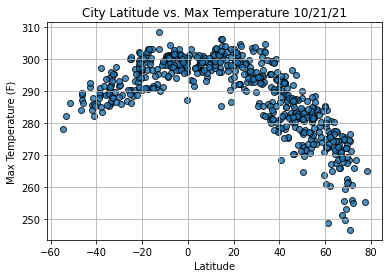

In [122]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

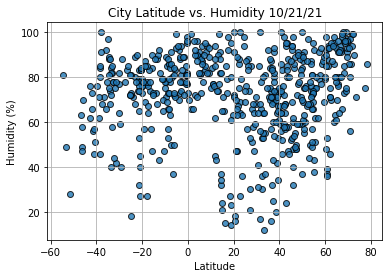

In [123]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

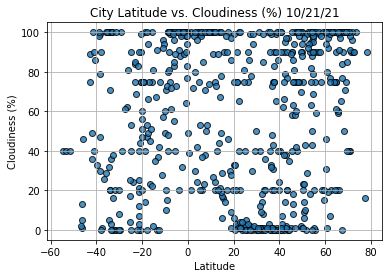

In [124]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

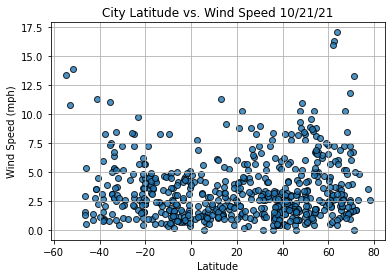

In [125]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [126]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [127]:
index13 = city_data_df.loc[13]

In [128]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
578     True
579     True
580     True
581     True
582     True
Name: Lat, Length: 583, dtype: bool

In [129]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Albany,US,2021-10-21 22:37:09,42.6001,-73.9662,292.47,68,79,1.89
3,Marsh Harbour,BS,2021-10-21 22:41:29,26.5412,-77.0636,299.74,74,86,6.94
4,Ponta Do Sol,PT,2021-10-21 22:40:47,32.6667,-17.1000,294.66,64,8,2.99
7,Sulangan,PH,2021-10-21 22:41:30,11.1373,123.7228,301.52,77,89,6.14
8,Matagami,CA,2021-10-21 22:41:30,49.7502,-77.6328,273.21,100,90,3.09


In [130]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

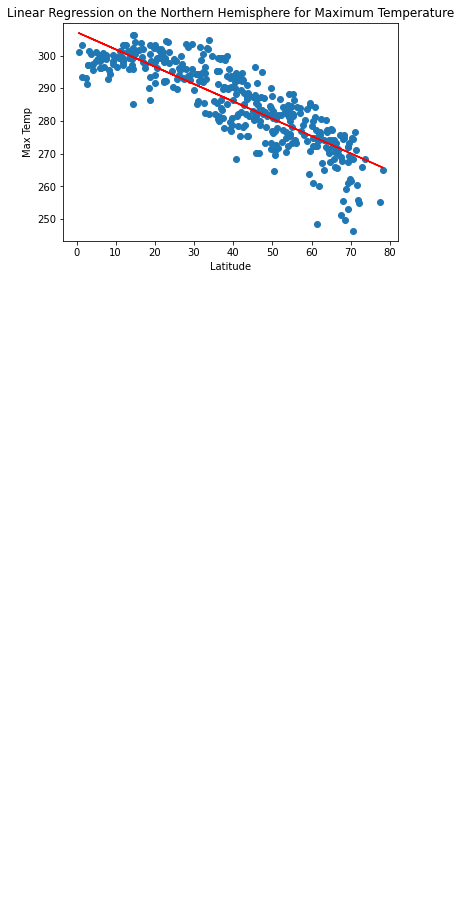

In [142]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

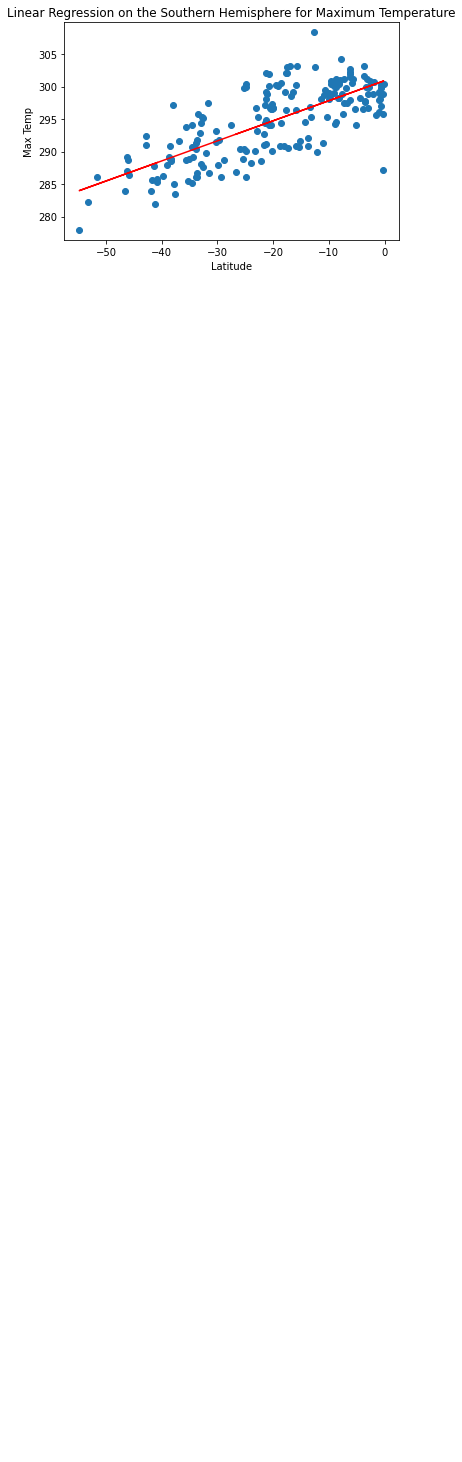

In [141]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


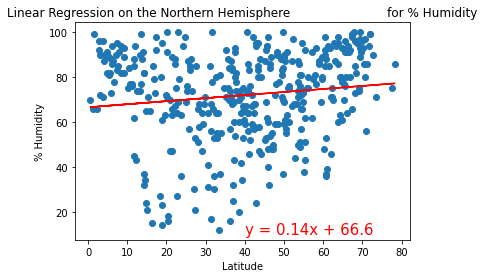

In [132]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

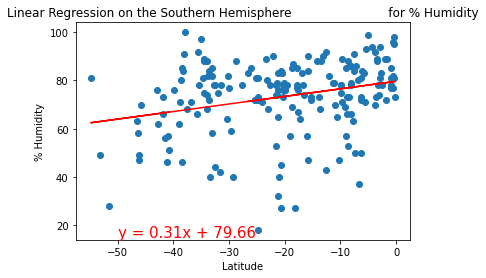

In [112]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

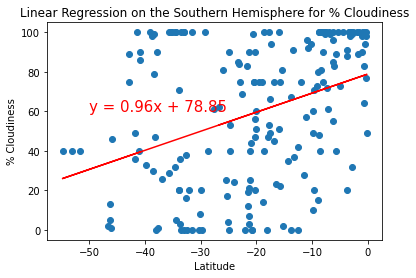

In [138]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

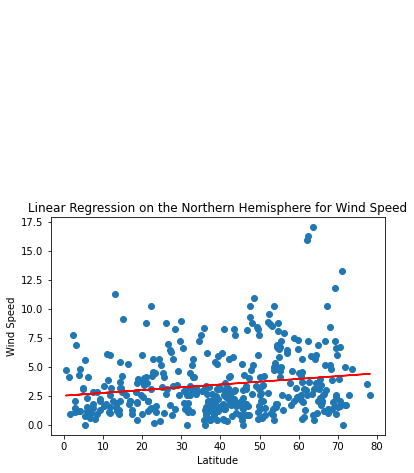

In [140]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))